# KNN

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Set plot styles
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')

In [3]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_16/Zoo.csv")

# Preprocess

In [4]:
# Display basic dataset information
print("Dataset Overview:")
df.head()

Dataset Overview:


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
# Feature-target split
X = df.drop(['animal name', 'type'], axis=1)  # Exclude non-predictive columns
y = df['type']  # Target variable

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

# Implement the K-Nearest Neighbours algorithm 

In [10]:
# Initialize and fit KNN classifier
k_value = 3
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Predict on test set
y_pred = knn.predict(X_test)

# Classifier's performance 

In [12]:
# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.97      0.92      0.93        21
weighted avg       0.96      0.95      0.95        21

Accuracy: 0.9524


In [13]:
# Find the best K using cross-validation
train_acc = []
test_acc = []
cv_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

# Visualize

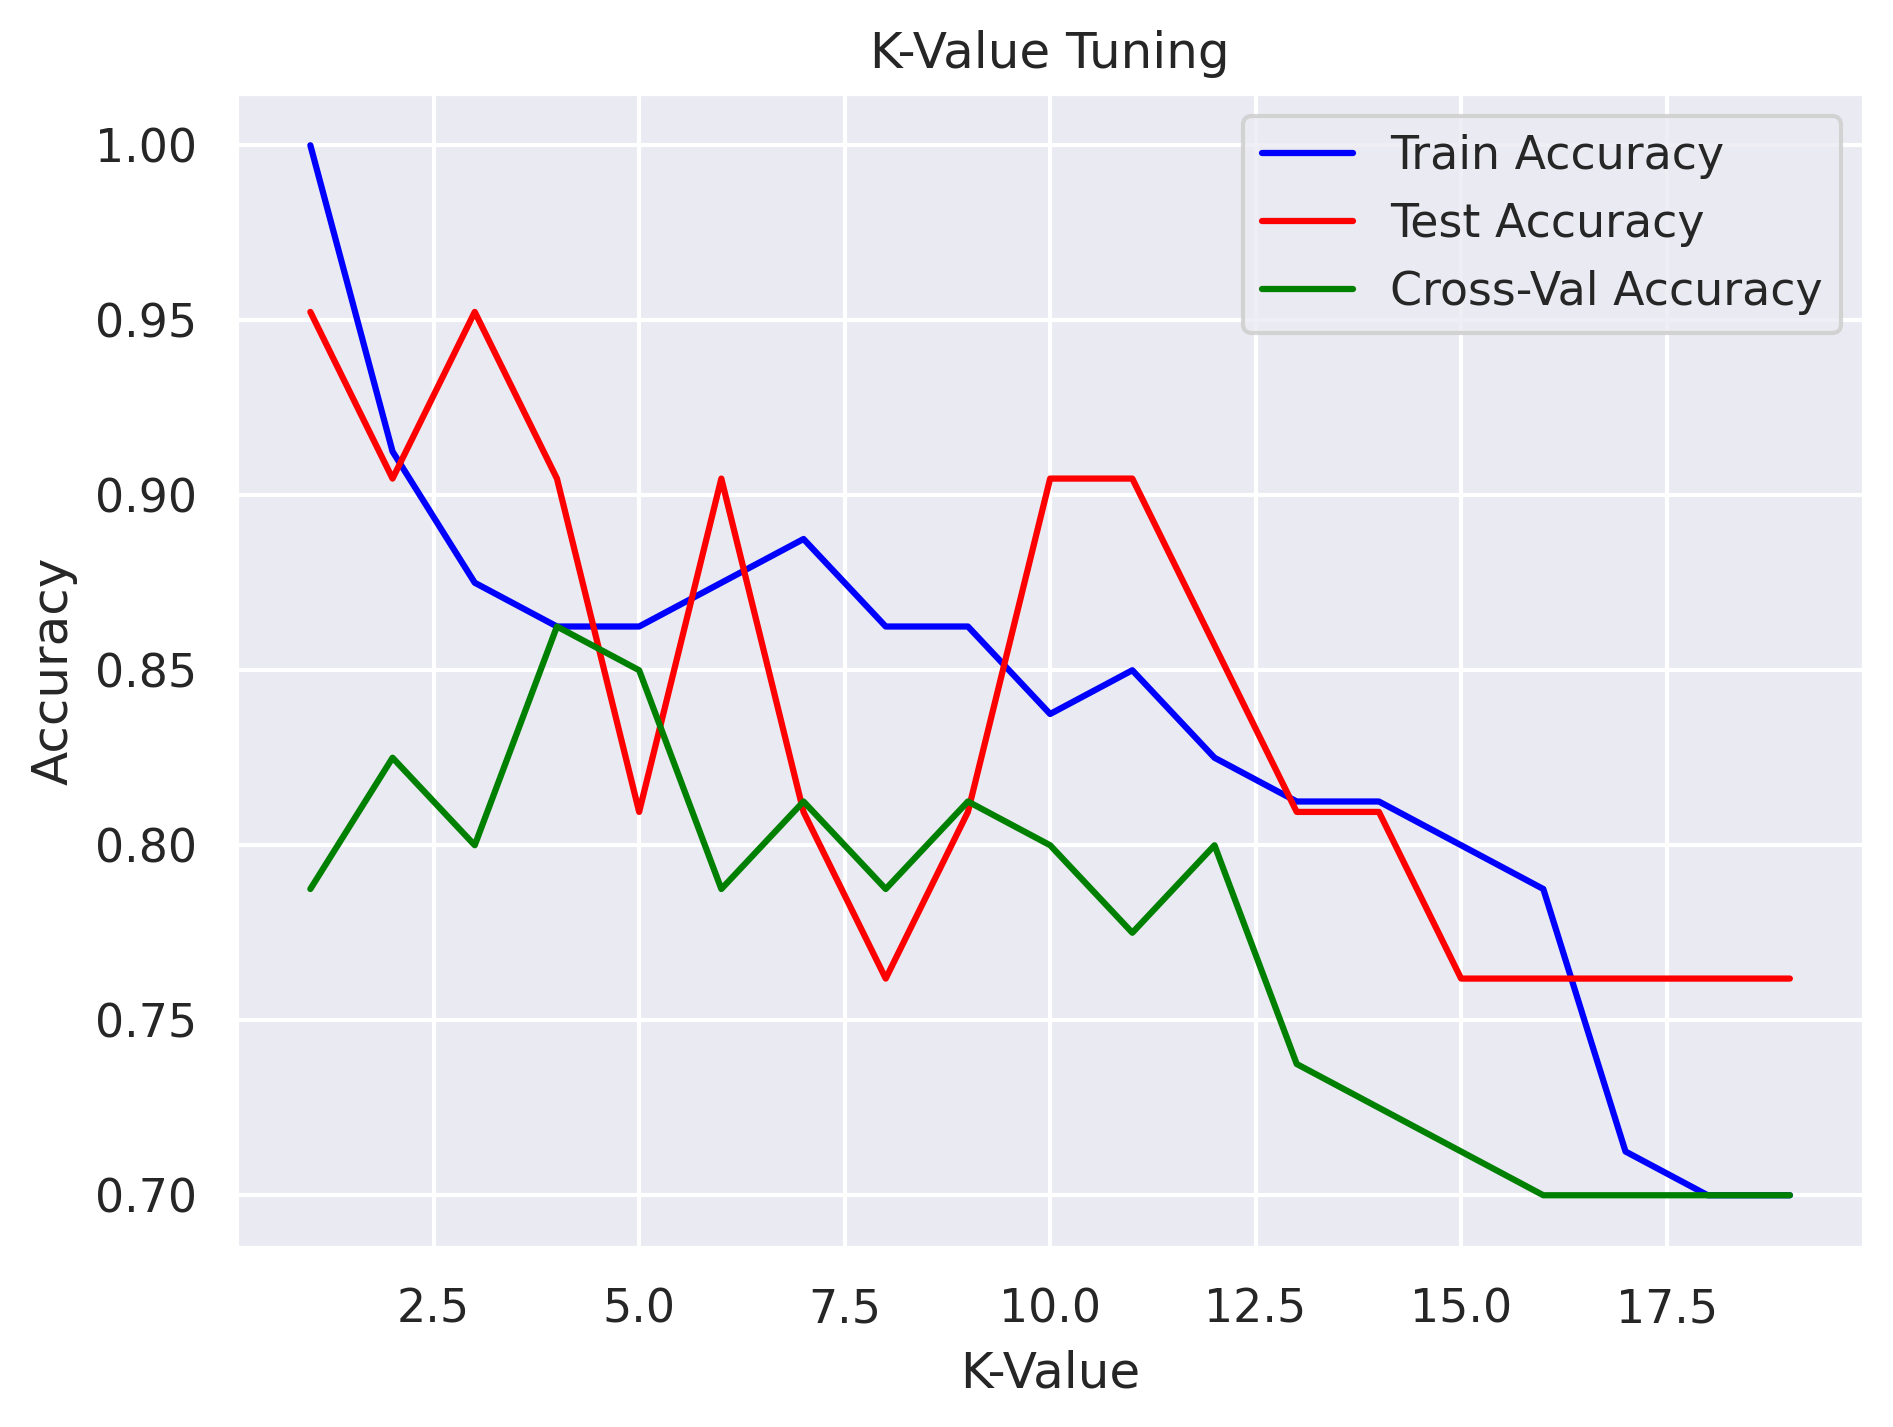

In [14]:
# Plotting accuracy for different K-values
plt.plot(range(1, 20), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, 20), test_acc, label='Test Accuracy', color='red')
plt.plot(range(1, 20), cv_scores, label='Cross-Val Accuracy', color='green')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-Value Tuning')
plt.legend()
plt.show()

In [15]:
# Create a meshgrid for visualization based on the first two features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [16]:
# Create grid points for only the first two features (keeping the rest fixed)
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [17]:
# Initialize and train the KNN model using the original data (first two features)
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train[:, :2], y_train)  # Fit on the first two features

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Predict on the grid points (which are also based on the first two features)
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

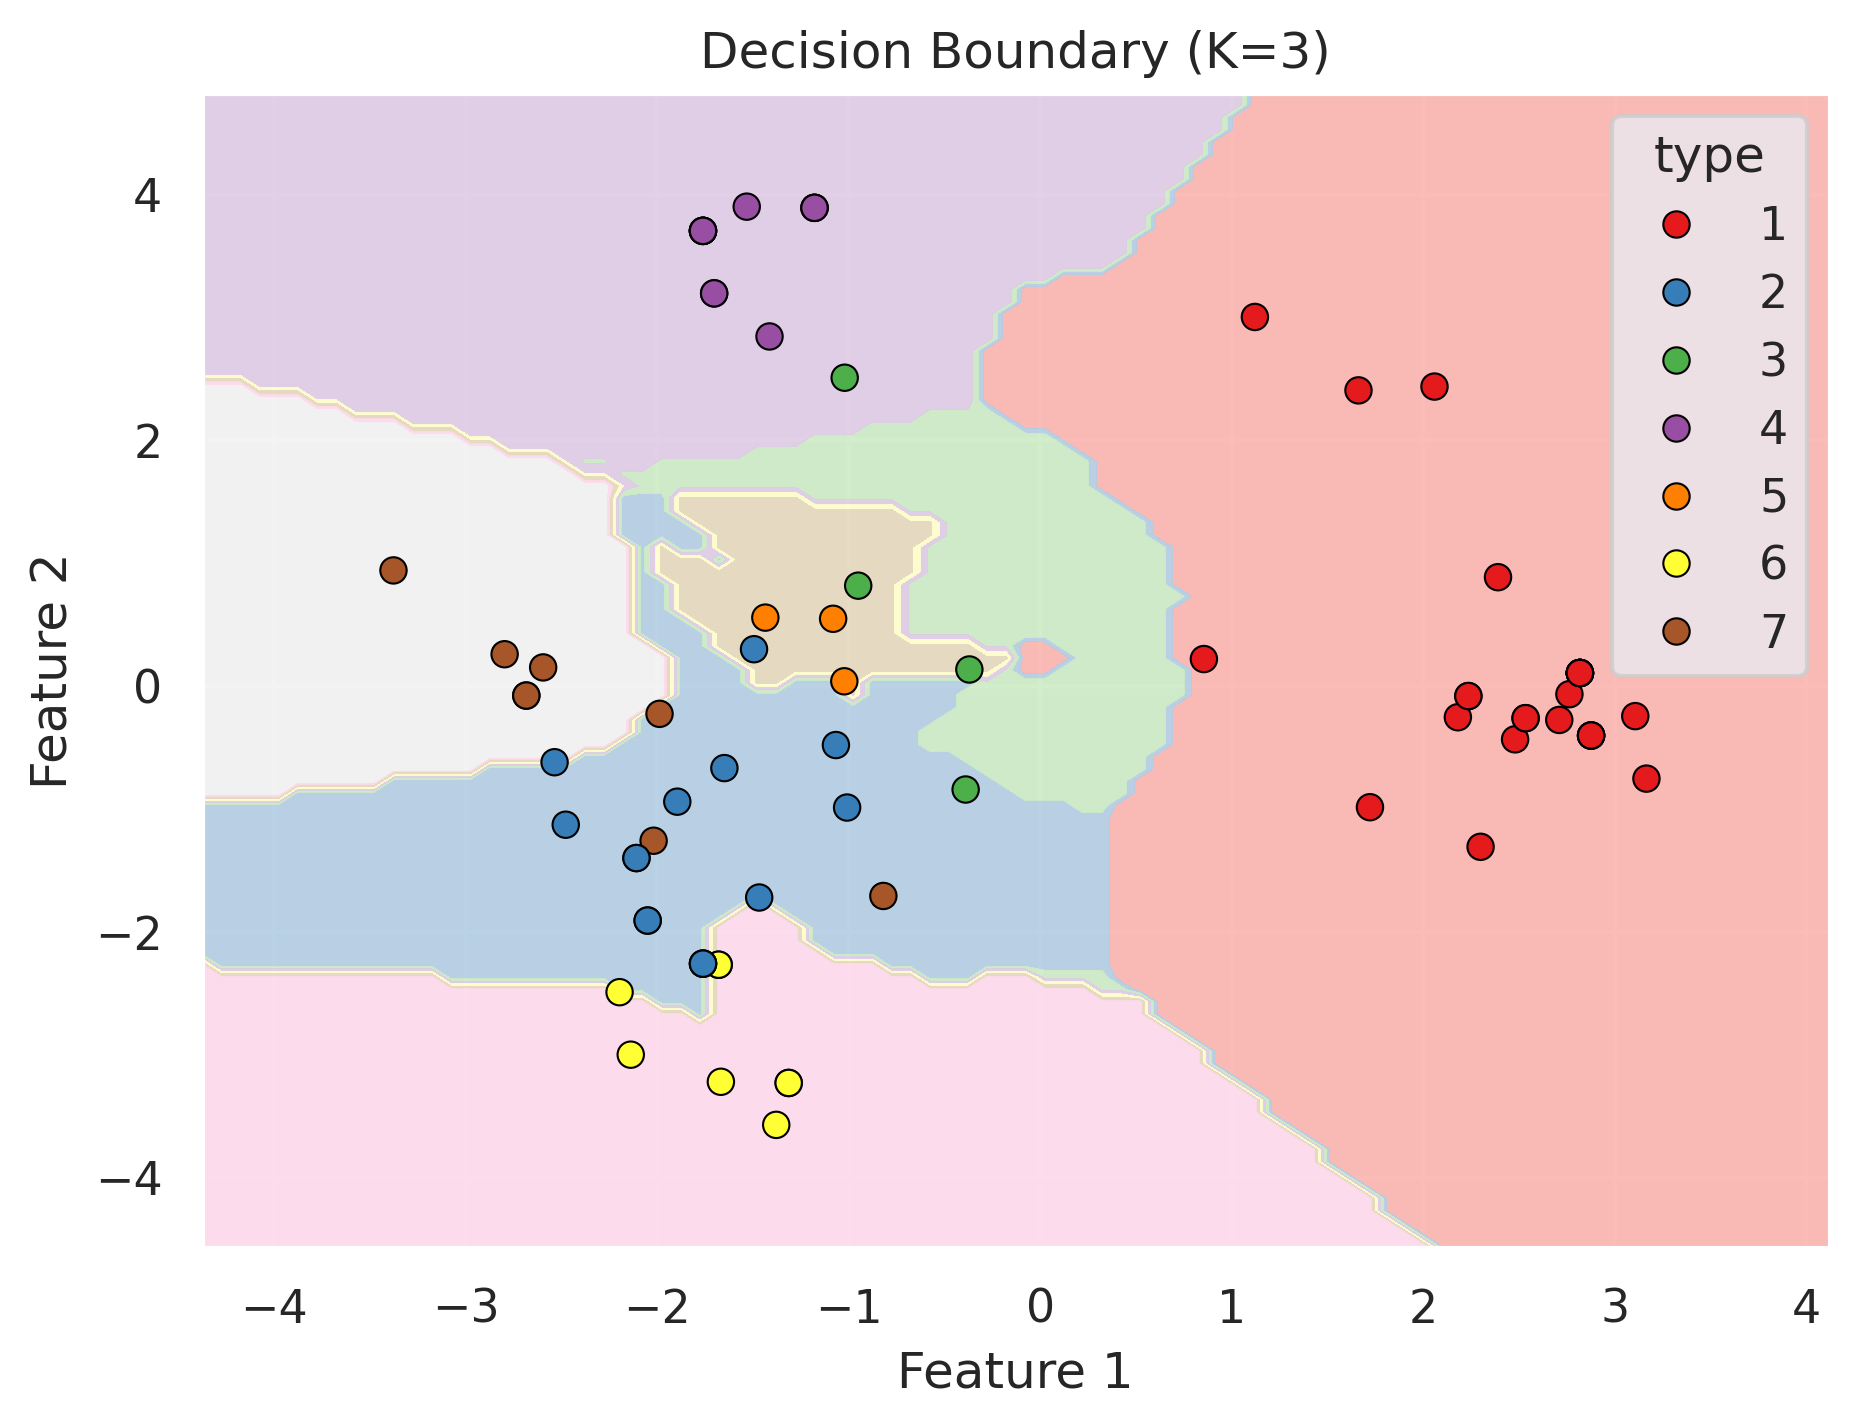

In [19]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.9, cmap='Pastel1')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='Set1', s=40, edgecolor='k')
plt.title(f"Decision Boundary (K={k_value})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()